# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max.columns", None)  

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import category_encoders as ce
import statsmodels.api as sm
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import classification_report, r2_score, mean_squared_error, mean_absolute_error

from warnings import filterwarnings
filterwarnings("ignore")

# Importing the dataset

In [2]:
df1 = pd.read_csv("products_dataset.csv") 
df2 = pd.read_csv("order_items_dataset.csv") 
df3 = pd.read_csv("sellers_dataset.csv") 
df4 = pd.read_csv("geolocation_dataset.csv")
df5 = pd.read_csv("customers_dataset.csv")  
df6 = pd.read_csv("orders_dataset.csv") 
df7 = pd.read_csv("order_payments_dataset.csv") 
df8 = pd.read_csv("order_reviews_dataset.csv") 

In [3]:
df_cat_name = pd.read_csv("product_category_name_translation.csv")

In [4]:
#Rename the product_category_name_english column
df_cat_name.rename(columns = {"product_category_name_english":"product_category_name1"}, inplace=True)

#Confirm the change in the column name
df_cat_name.columns

Index(['product_category_name', 'product_category_name1'], dtype='object')

In [5]:
 df_cat_name.head()

,product_category_name,product_category_name1
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### Merging all csv file into one

In [6]:
merged_df = pd.merge(df6, df2, on='order_id')
merged_df = pd.merge(merged_df, df7, on='order_id')
merged_df = pd.merge(merged_df, df8, on='order_id')
merged_df = pd.merge(merged_df, df1, on='product_id')
merged_df = pd.merge(merged_df, df5, on='customer_id')
merged_df = pd.merge(merged_df, df3, on='seller_id')

merged_df.shape

(117329, 39)

In [7]:
merged_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,1,credit_card,1,18.12,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,3,voucher,1,2.00,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,2,voucher,1,18.59,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350,maua,SP
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,1,credit_card,3,37.77,b46f1e34512b0f4c74a72398b03ca788,4,NaN,Deveriam embalar melhor o produto. A caixa vei...,2017-08-19 00:00:00,2017-08-20 15:16:36,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,9350,maua,SP
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,1,credit_card,1,37.77,dc90f19c2806f1abba9e72ad3c350073,5,NaN,"Só achei ela pequena pra seis xícaras ,mais é ...",2017-08-08 00:00:00,2017-08-08 23:26:23,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,9350,maua,SP


In [125]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117329 entries, 0 to 117328
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       117329 non-null  object 
 1   customer_id                    117329 non-null  object 
 2   order_status                   117329 non-null  object 
 3   order_purchase_timestamp       117329 non-null  object 
 4   order_approved_at              117314 non-null  object 
 5   order_delivered_carrier_date   116094 non-null  object 
 6   order_delivered_customer_date  114858 non-null  object 
 7   order_estimated_delivery_date  117329 non-null  object 
 8   order_item_id                  117329 non-null  int64  
 9   product_id                     117329 non-null  object 
 10  seller_id                      117329 non-null  object 
 11  shipping_limit_date            117329 non-null  object 
 12  price                         

In [126]:
merged_df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'seller_zip_code_prefix', 'seller_city',
       'seller_state'],
      dtype='object')

In [101]:
# Converting datetime data type

merged_df['order_purchase_timestamp'] = pd.to_datetime(merged_df['order_purchase_timestamp'])
merged_df['order_approved_at'] = pd.to_datetime(merged_df['order_approved_at'])
merged_df['order_delivered_carrier_date'] = pd.to_datetime(merged_df['order_delivered_carrier_date'])
merged_df['order_delivered_customer_date'] = pd.to_datetime(merged_df['order_delivered_customer_date'])
merged_df['order_estimated_delivery_date'] = pd.to_datetime(merged_df['order_estimated_delivery_date'])
merged_df['shipping_limit_date'] = pd.to_datetime(merged_df['shipping_limit_date'])
merged_df['review_creation_date'] = pd.to_datetime(merged_df['review_creation_date'])
merged_df['review_answer_timestamp'] = pd.to_datetime(merged_df['review_answer_timestamp'])


# EDA

In [127]:
#Top sales by State

TopSales_state = merged_df.groupby(["customer_state"]).agg({"payment_value":"sum"})
TopSales_state.sort_values(ascending=False, by="payment_value")[:10].reset_index()

,customer_state,payment_value
0,SP,7599878.17
1,RJ,2741288.10
2,MG,2313559.77
3,RS,1151947.74
4,PR,1066626.81
5,BA,791726.11
6,SC,778620.70
7,GO,469961.30
8,DF,433599.85
9,ES,392818.65


In [128]:
merged_df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'seller_zip_code_prefix', 'seller_city',
       'seller_state'],
      dtype='object')

In [130]:
#Top sales by product category per state and city.


TopProduct_city = merged_df.groupby(["customer_state", "customer_city", "product_category_name"]).agg({"payment_value":"sum"})
TopProduct_city = TopProduct_city.sort_values(ascending=False, by="payment_value")[:13].reset_index()
TopProduct_city

,customer_state,customer_city,product_category_name,payment_value
0,SP,sao paulo,cama_mesa_banho,295685.33
1,SP,sao paulo,informatica_acessorios,288500.24
2,SP,sao paulo,beleza_saude,263482.10
3,SP,sao paulo,relogios_presentes,194797.90
4,SP,sao paulo,esporte_lazer,192716.46
5,SP,sao paulo,moveis_decoracao,192627.46
6,SP,sao paulo,utilidades_domesticas,165754.91
7,RJ,rio de janeiro,cama_mesa_banho,127026.50
8,RJ,rio de janeiro,telefonia_fixa,112491.22
9,RJ,rio de janeiro,esporte_lazer,107840.56


In [67]:
#Top sales by product category per state and city.
TopProduct_city = merged_df.groupby(["customer_state", "customer_city", "product_category_name"]).agg({"payment_value":"sum"})
TopProduct_city = TopProduct_city.sort_values(ascending=False, by="payment_value")[:13].reset_index()
TopProduct_city

,customer_state,customer_city,product_category_name,payment_value
0,SP,sao paulo,cama_mesa_banho,295685.33
1,SP,sao paulo,informatica_acessorios,288500.24
2,SP,sao paulo,beleza_saude,263482.10
3,SP,sao paulo,relogios_presentes,194797.90
4,SP,sao paulo,esporte_lazer,192716.46
5,SP,sao paulo,moveis_decoracao,192627.46
6,SP,sao paulo,utilidades_domesticas,165754.91
7,RJ,rio de janeiro,cama_mesa_banho,127026.50
8,RJ,rio de janeiro,telefonia_fixa,112491.22
9,RJ,rio de janeiro,esporte_lazer,107840.56


Text(0, 0.5, 'Sales')

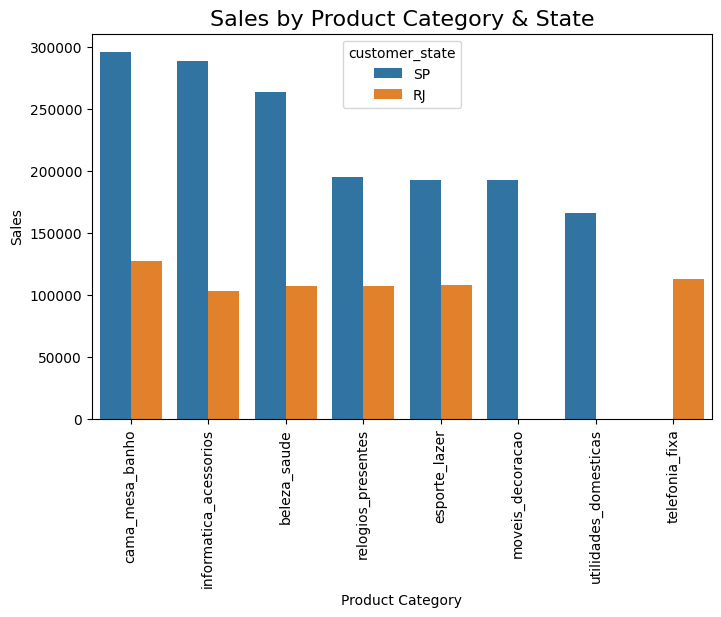

In [42]:
#Plot top saless by state and product category
plt.figure(figsize=(8,5))
sns.barplot(x="product_category_name", y='payment_value', hue = "customer_state", data=TopProduct_city)
plt.xticks(rotation=90)
plt.title('Sales by Product Category & State', fontsize=16)
plt.xlabel('Product Category')
plt.ylabel('Sales')

- Sao Paulo city in SP state is observed to have made the highest total sales.

In [45]:
#Top sales by product category per state and city.
TopProduct_city = merged_df.groupby(["customer_state", "customer_city", "product_category_name"]).agg({"payment_value":"sum", "order_item_id":"count"})
TopProduct_city = TopProduct_city.sort_values(ascending=False, by="payment_value")[:13].reset_index()
TopProduct_city

,customer_state,customer_city,product_category_name,payment_value,order_item_id
0,SP,sao paulo,cama_mesa_banho,295685.33,2172
1,SP,sao paulo,informatica_acessorios,288500.24,1256
2,SP,sao paulo,beleza_saude,263482.10,1792
3,SP,sao paulo,relogios_presentes,194797.90,861
4,SP,sao paulo,esporte_lazer,192716.46,1462
5,SP,sao paulo,moveis_decoracao,192627.46,1357
6,SP,sao paulo,utilidades_domesticas,165754.91,1397
7,RJ,rio de janeiro,cama_mesa_banho,127026.50,907
8,RJ,rio de janeiro,telefonia_fixa,112491.22,24
9,RJ,rio de janeiro,esporte_lazer,107840.56,606


Text(0, 0.5, 'Sales')

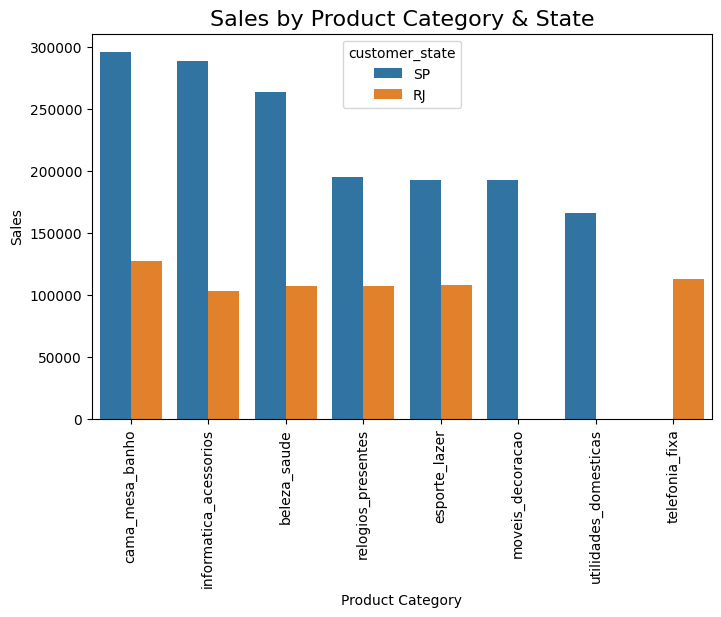

In [46]:
#Plot top sales by state and product category
plt.figure(figsize=(8,5))

sns.barplot(x="product_category_name", y='payment_value', hue = "customer_state", data=TopProduct_city)

plt.xticks(rotation=90)
plt.title('Sales by Product Category & State', fontsize=16)
plt.xlabel('Product Category')
plt.ylabel('Sales')

Text(0, 0.5, 'Orders')

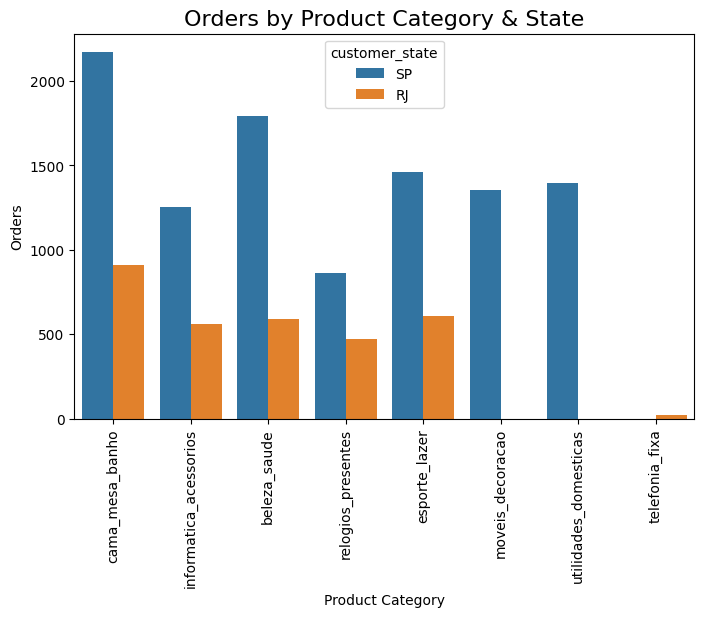

In [48]:
#Plot top orders by state and product category
plt.figure(figsize=(8,5))

sns.barplot(x="product_category_name", y='order_item_id', hue = "customer_state", data=TopProduct_city)

plt.xticks(rotation=90)
plt.title('Orders by Product Category & State', fontsize=16)
plt.xlabel('Product Category')
plt.ylabel('Orders')

In [50]:
# Lets look at the total customers by state and city
Tot_Cus_city = merged_df.groupby(["customer_state", "customer_city"]).agg({"customer_id":"count"})
Tot_Cus_city = Tot_Cus_city.sort_values(ascending=False, by="customer_id")[:10].reset_index()
Tot_Cus_city

,customer_state,customer_city,customer_id
0,SP,sao paulo,18582
1,RJ,rio de janeiro,8158
2,MG,belo horizonte,3252
3,DF,brasilia,2466
4,PR,curitiba,1807
5,SP,campinas,1723
6,RS,porto alegre,1658
7,BA,salvador,1507
8,SP,guarulhos,1386
9,SP,sao bernardo do campo,1119


In [52]:
#Lets review the Top10 products by total sales & orders
Top10_products = merged_df.groupby("product_category_name").agg({"payment_value":"sum", "order_id":"nunique", "order_item_id":"count"})
Top10_products = Top10_products.sort_values(ascending=False, by=["payment_value", "order_id"])[:10].reset_index()
Top10_products

,product_category_name,payment_value,order_id,order_item_id
0,cama_mesa_banho,1725465.67,9313,11847
1,beleza_saude,1646292.53,8770,9944
2,informatica_acessorios,1592611.66,6649,8105
3,moveis_decoracao,1427214.01,6398,8743
4,relogios_presentes,1420682.17,5576,6161
5,esporte_lazer,1390581.87,7669,8942
6,utilidades_domesticas,1091709.15,5843,7331
7,ferramentas_jardim,834757.45,3496,4558
8,automotivo,802254.74,3877,4356
9,cool_stuff,772616.70,3599,3964


Text(0, 0.5, 'Orders')

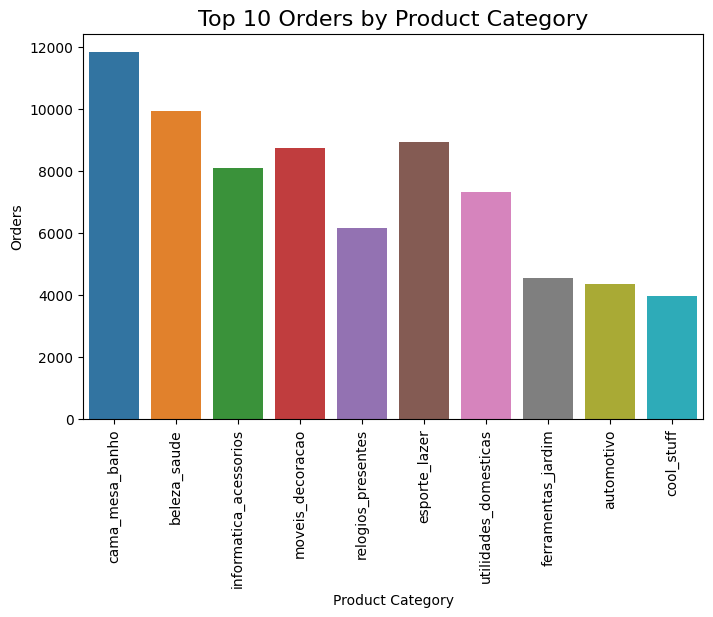

In [53]:
#Plot top orders by state and product category
plt.figure(figsize=(8,5))

sns.barplot(x="product_category_name", y='order_item_id', data=Top10_products,errorbar=None)
plt.xticks(rotation=90)
plt.title('Top 10 Orders by Product Category', fontsize=16)
plt.xlabel('Product Category')
plt.ylabel('Orders')


Text(0, 0.5, 'Sales')

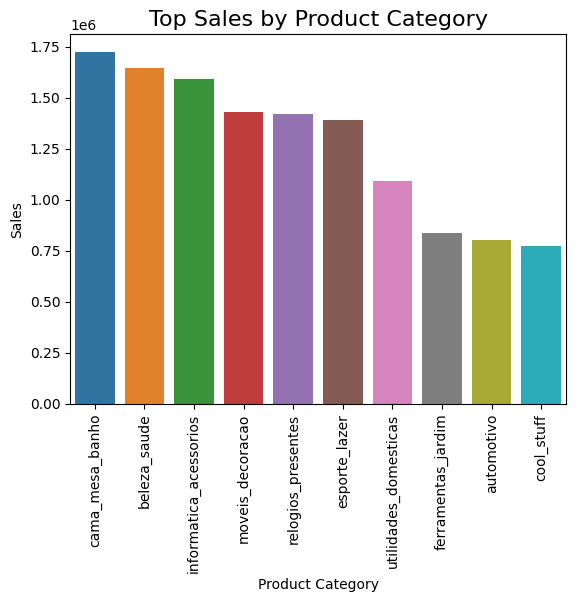

In [54]:
#Plot top orders by state and product category
sns.barplot(x="product_category_name", y='payment_value', data=Top10_products,errorbar=None)

plt.xticks(rotation=90)
plt.title('Top Sales by Product Category', fontsize=16)
plt.xlabel('Product Category')
plt.ylabel('Sales')

In [56]:
#Confirming the average price & freight value by Product category
MeanSales_cat = merged_df.groupby(["product_category_name"]).agg({"price":"mean", "freight_value":"mean"})
MeanSales_cat = MeanSales_cat.sort_values(ascending=False, by="price")[:10].reset_index()
MeanSales_cat

,product_category_name,price,freight_value
0,pcs,1078.555806,47.247281
1,portateis_casa_forno_e_cafe,627.509103,36.982821
2,eletrodomesticos_2,459.567388,46.039925
3,agro_industria_e_comercio,332.706151,27.646111
4,instrumentos_musicais,290.755042,27.321798
5,eletroportateis,285.925980,23.982189
6,portateis_cozinha_e_preparadores_de_alimentos,264.568667,20.650667
7,telefonia_fixa,227.291004,17.538587
8,construcao_ferramentas_seguranca,211.861162,20.068182
9,relogios_presentes,202.204692,16.822451


Text(0, 0.5, 'Freight Value')

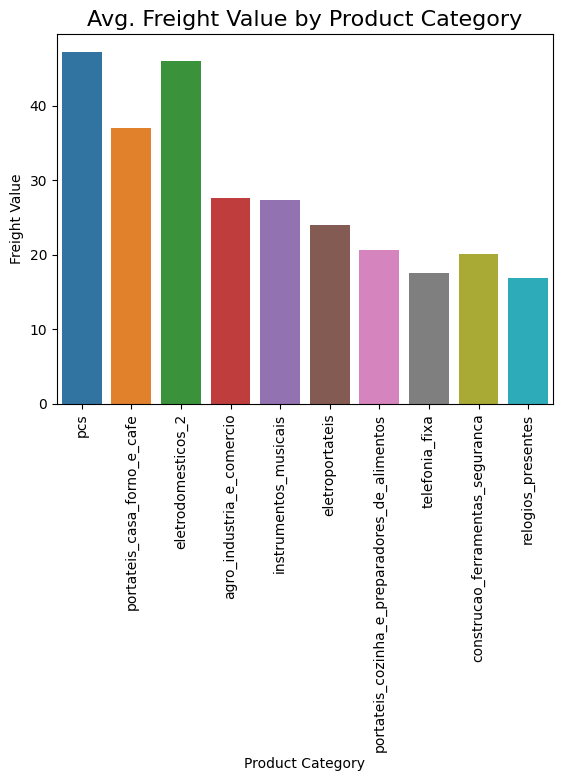

In [57]:
#Plot avg freight by product category

sns.barplot(x="product_category_name", y='freight_value', data=MeanSales_cat,errorbar=None)

plt.xticks(rotation=90)
plt.title('Avg. Freight Value by Product Category', fontsize=16)
plt.xlabel('Product Category')
plt.ylabel('Freight Value')

# Univariate Analysis

Text(0.5, 1.0, 'Top 10 Customers Capacity Cities')

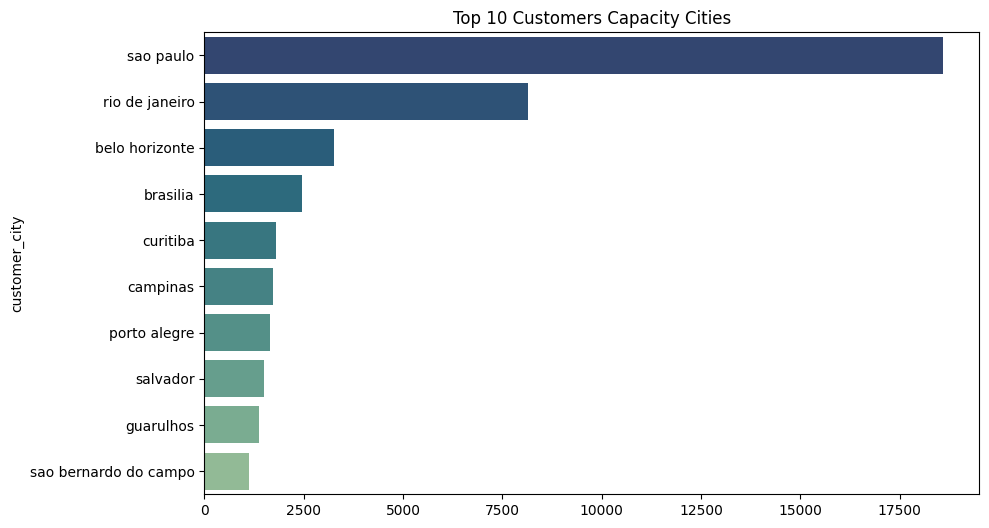

In [133]:
#Top 10 Customers Capacity Cities
plt.figure(figsize=[10, 6])
sns.barplot(x = merged_df.customer_city.value_counts().values[:10], y = merged_df.customer_city.value_counts().index[:10], palette= 'crest_r')
plt.title('Top 10 Customers Capacity Cities')

Text(0.5, 1.0, 'Review Scores')

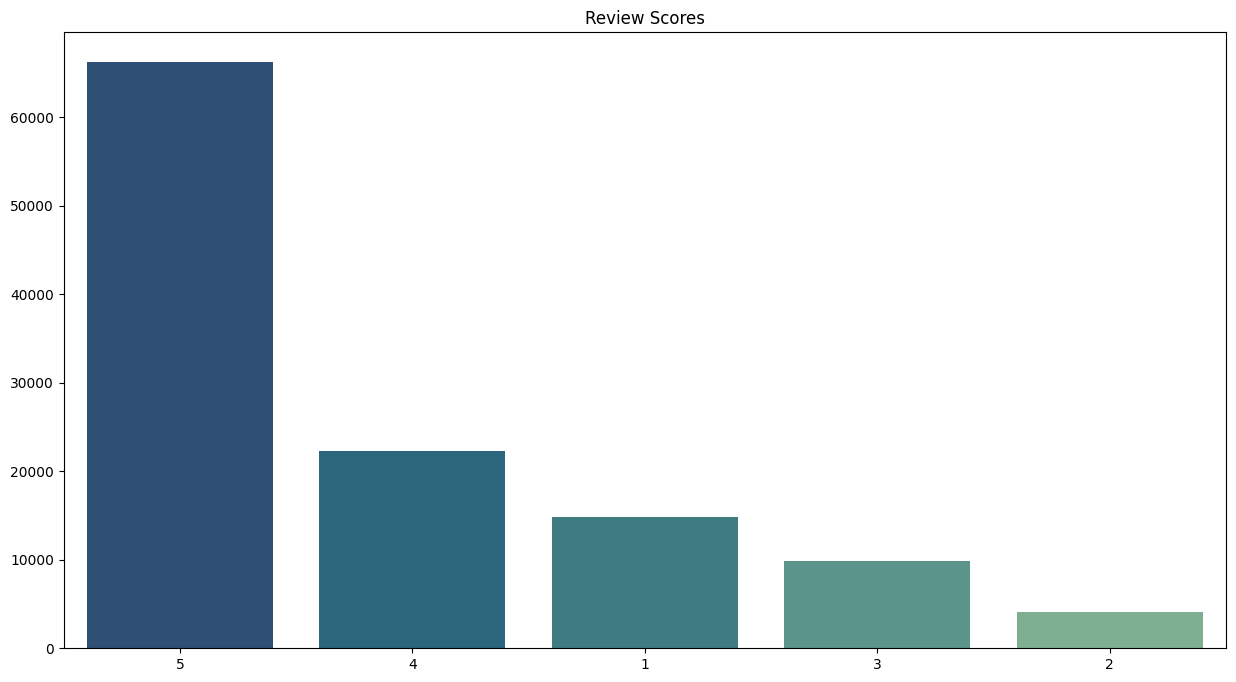

In [135]:
#Review_Score
plt.figure(figsize=[15, 8])
review_score_index = [str(i) for i in merged_df.review_score.value_counts().index]
sns.barplot(x = review_score_index, y= merged_df.review_score.value_counts().values, palette= 'crest_r')
plt.title('Review Scores')

Text(0.5, 1.0, 'Price Distribution')

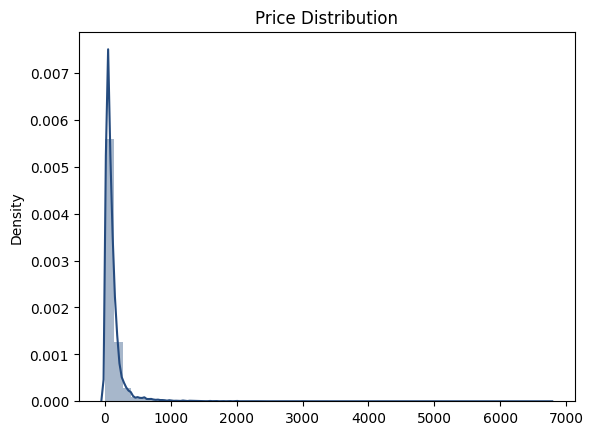

In [136]:
#Price

sns.set_palette('crest_r')
sns.distplot(x = merged_df.price)
plt.title('Price Distribution')


Text(0.5, 1.0, 'Freight Value Distribution')

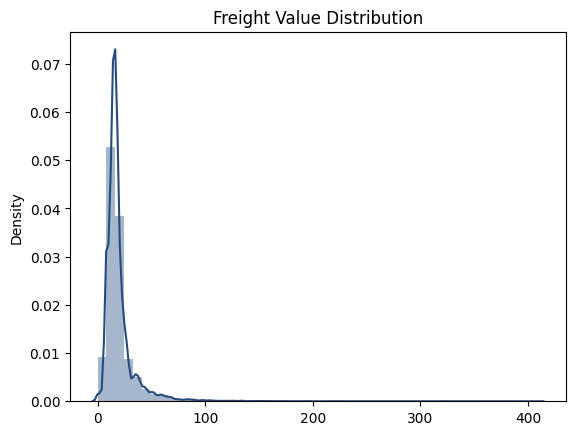

In [138]:
#Freight Value 
sns.set_palette('crest_r')
sns.distplot(x = merged_df.freight_value)
plt.title('Freight Value Distribution')

Text(0, 0.5, 'Revenue per Payment type (Millions)')

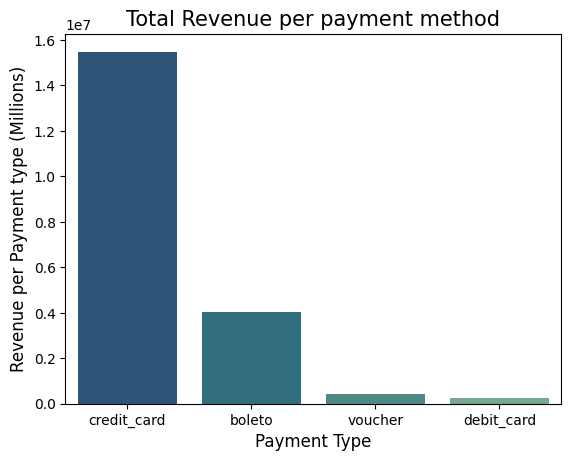

In [139]:
# Group each payment type by average payment value
payment_methods = merged_df.groupby('payment_type')[['payment_value']].sum().sort_values(by='payment_value', ascending=False)
payment_methods.reset_index(inplace=True)

# plot Average payments per payment method
 
sns.barplot(x = payment_methods.payment_type, y= payment_methods.payment_value, palette= 'crest_r')
plt.title('Total Revenue per payment method', fontsize= 15)
plt.xlabel('Payment Type', fontsize= 12)
plt.ylabel('Revenue per Payment type (Millions)', fontsize= 12)


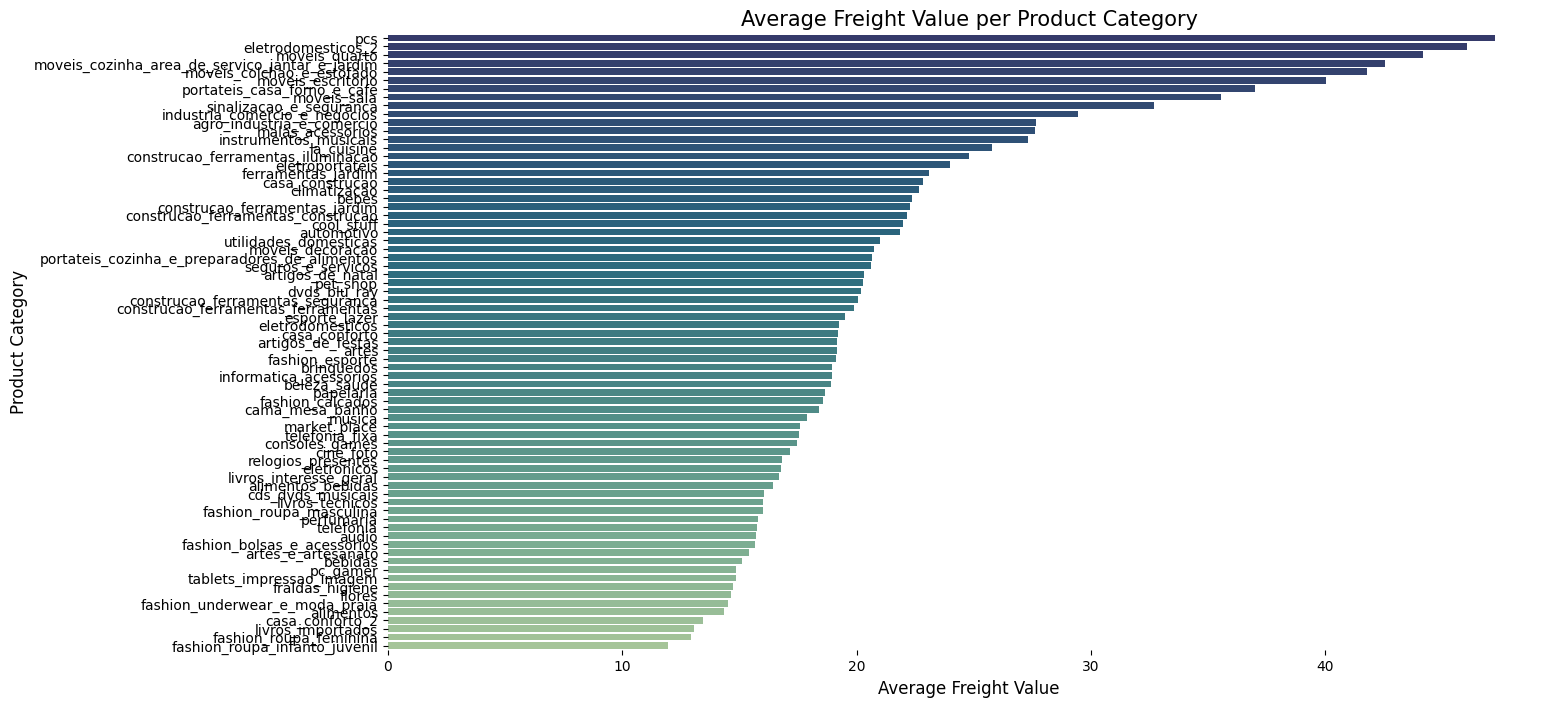

In [150]:
# Group product category by average freight value


freight_per_cat = merged_df.groupby('product_category_name')[['freight_value']].mean().sort_values(by='freight_value', ascending=False)
freight_per_cat.reset_index(inplace=True)
plt.figure(figsize=[15, 8])
sns.barplot(x = freight_per_cat.freight_value, y=  freight_per_cat.product_category_name, palette= 'crest_r')
plt.title('Average Freight Value per Product Category', fontsize= 15)
plt.xlabel('Average Freight Value',fontsize= 12)
plt.ylabel('Product Category', fontsize= 12)
ax = plt.gca()
ax.set_frame_on(False);

#### Divide the data according to categorical and Numeric datatypes 

In [44]:
df_num = merged_df.select_dtypes(include=np.number)
df_cat = merged_df.select_dtypes(include='object')

In [7]:
all_id_col = ['review_id','order_id','customer_id','customer_unique_id','order_item_id','product_id','seller_id']
merged_df.drop(columns= all_id_col, axis = 1, inplace = True)

# Statistical Summary

In [73]:
df_num.describe().T   # Numeric columns 5 point summary

,count,mean,std,min,25%,50%,75%,max
price,117329.0,120.524349,182.944843,0.85,39.90,74.90,134.90,6735.00
freight_value,117329.0,20.027514,15.828077,0.00,13.08,16.28,21.18,409.68
payment_sequential,117329.0,1.094452,0.731174,1.00,1.00,1.00,1.00,29.00
payment_installments,117329.0,2.940151,2.775370,0.00,1.00,2.00,4.00,24.00
payment_value,117329.0,172.062565,265.388194,0.00,60.75,108.10,189.06,13664.08
review_score,117329.0,4.031467,1.387927,1.00,4.00,5.00,5.00,5.00
product_name_lenght,115634.0,48.768018,10.033831,5.00,42.00,52.00,57.00,76.00
product_description_lenght,115634.0,785.802861,652.382965,4.00,346.00,600.00,983.00,3992.00
product_photos_qty,115634.0,2.205528,1.717783,1.00,1.00,1.00,3.00,20.00
product_weight_g,117309.0,2110.763062,3785.128931,0.00,300.00,700.00,1800.00,40425.00


-  price, freight_value, and payment_value has minimum value 0.85 , 0 and 0 respectively indicates that this might be due to some promotion or offers applied on products.

In [74]:
df_num = df_num.drop('price',axis=1)

In [75]:
df_cat.describe()    # Categorical columns 5 point summary

,order_status,payment_type,review_comment_title,review_comment_message,product_category_name,customer_city,customer_state,seller_city,seller_state
count,117329,117329,13892,49679,115634,117329,117329,117329,117329
unique,7,4,4497,35691,73,4108,27,611,23
top,delivered,credit_card,Recomendo,Muito bom,cama_mesa_banho,sao paulo,SP,sao paulo,SP
freq,114859,86520,494,259,11847,18582,49527,29048,83671


# Outliers Treatment

In [79]:
df_num.columns

Index(['freight_value', 'payment_sequential', 'payment_installments',
       'payment_value', 'review_score', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'customer_zip_code_prefix', 'seller_zip_code_prefix'],
      dtype='object')

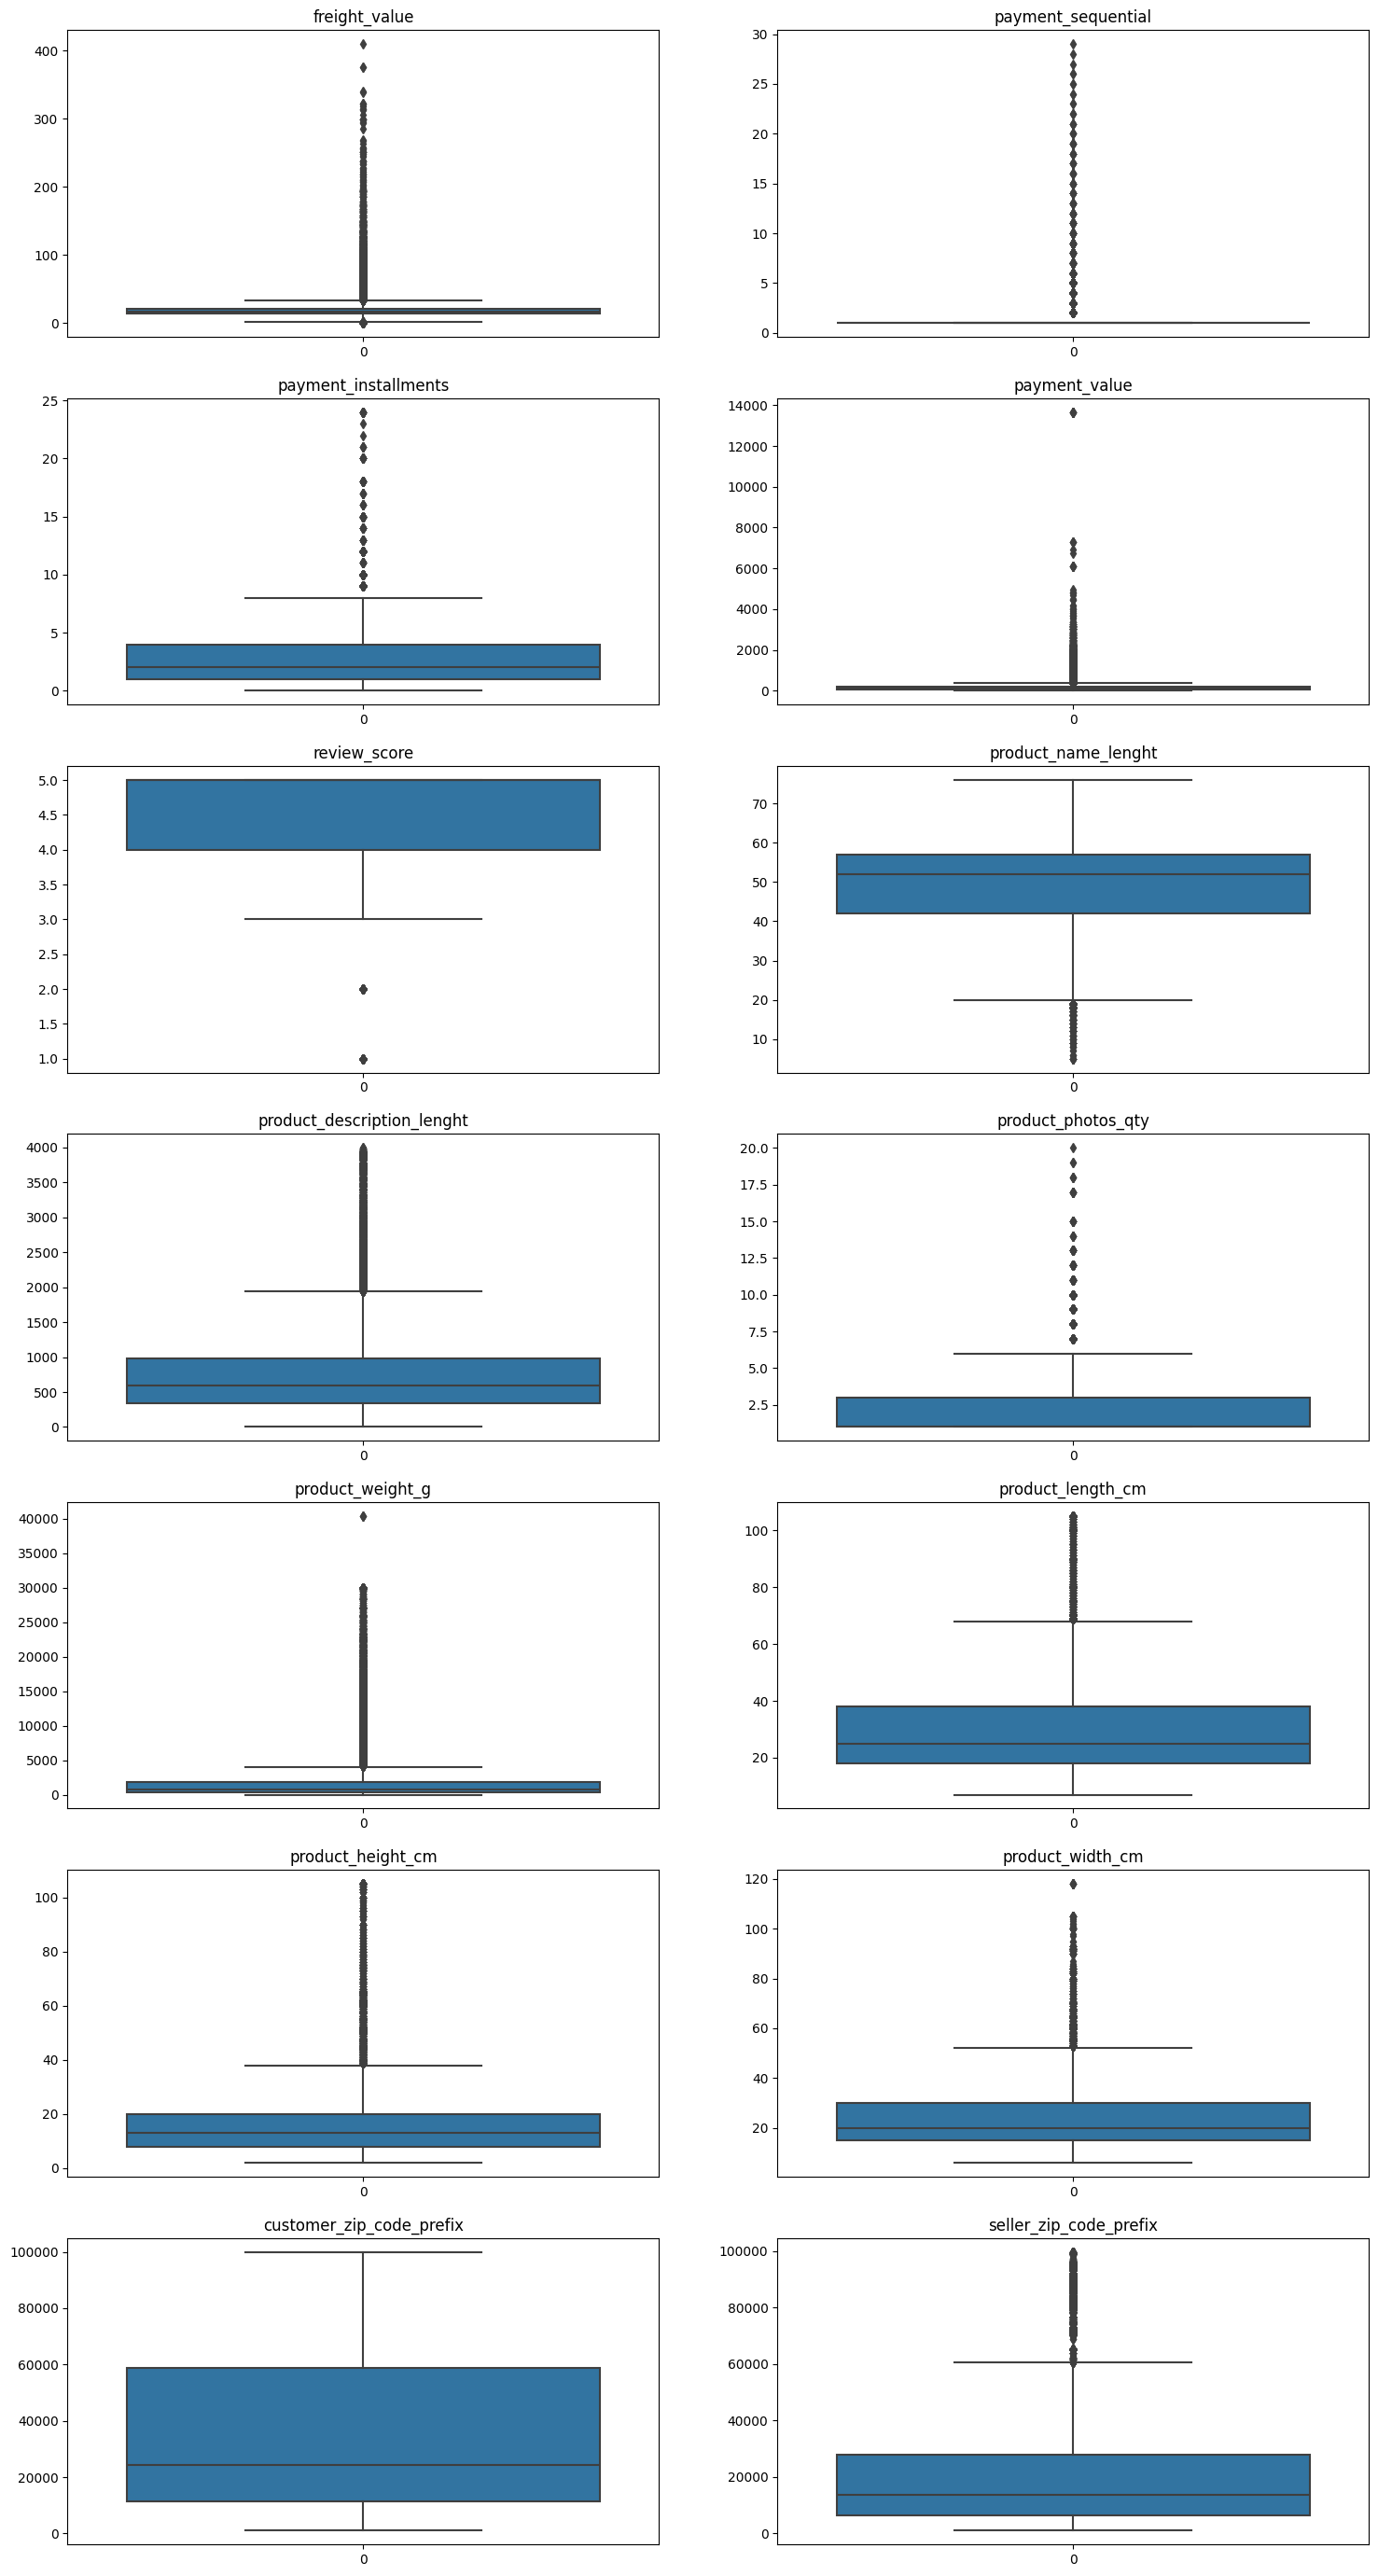

In [80]:
fig , ax  = plt.subplots(7,2,figsize = (18,35))

for variable, i in zip(df_num,ax.flatten()):
    boxplot = sns.boxplot(merged_df[variable],ax = i)
    boxplot.set_title(variable)
plt.show()

In [83]:
new_merged_df = merged_df.copy()

In [84]:
new_merged_df.columns

Index(['order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'shipping_limit_date', 'price',
       'freight_value', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'seller_zip_code_prefix', 'seller_city', 'seller_state'],
      dtype='object')

# Bivariate Analysis

# Correlation matrix

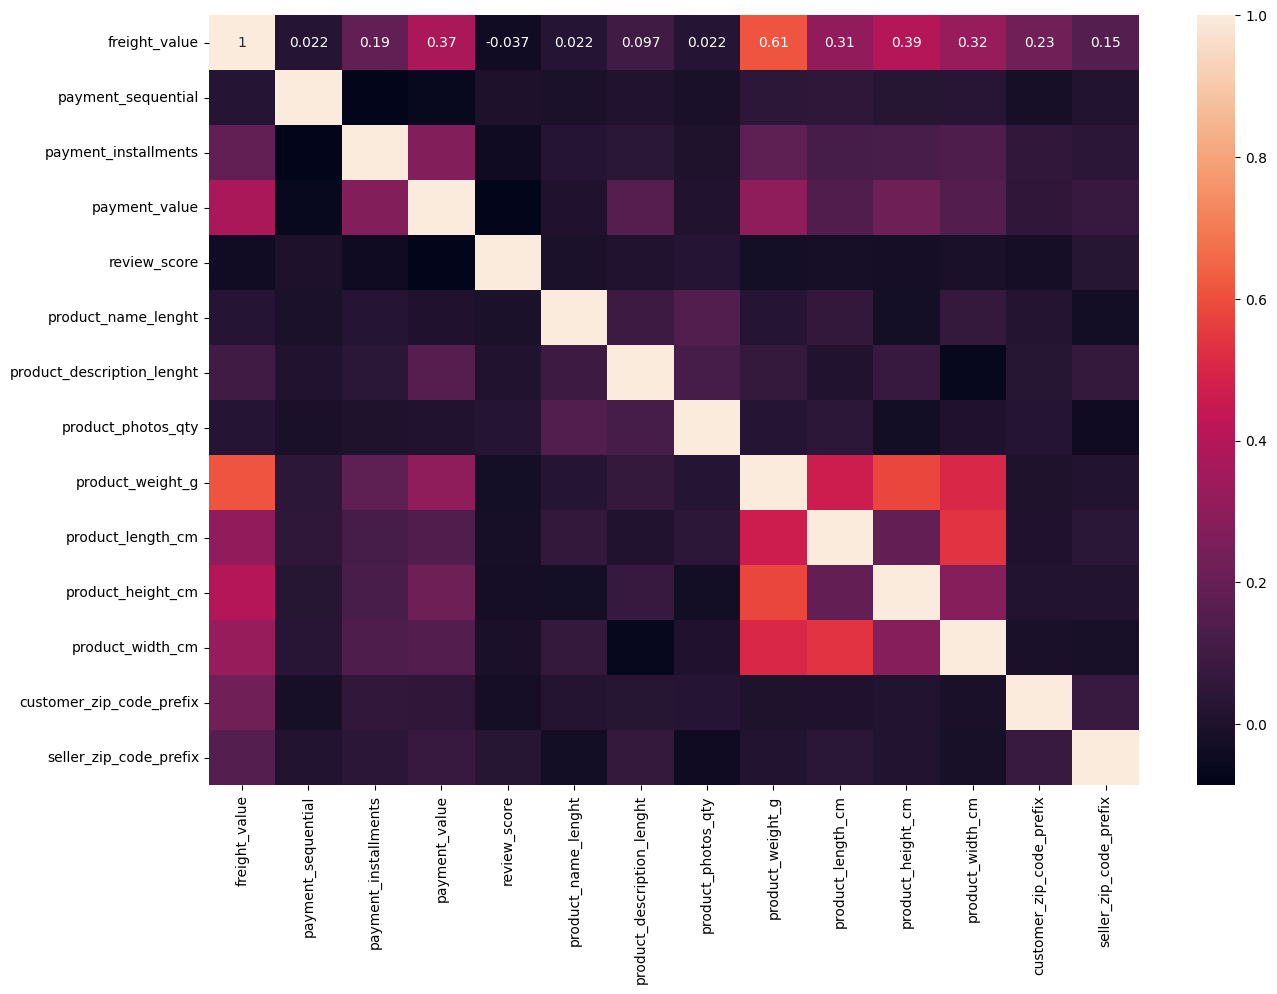

In [87]:
plt.figure(figsize=(15,10))
sns.heatmap(df_num.corr(), annot = True,fmt = '.2g')
plt.show()

- Product_weight_g and freight value shows positive correlation.
- Product_weight_g and Product_height_cm are also positively correlated.

# Missing values Treatments

In [88]:
(merged_df.isnull().sum()/(merged_df.index.size)*100)[(merged_df.isnull().sum()/merged_df.index.size)*100  > 0].sort_values(ascending=False)

review_comment_title             88.159790
review_comment_message           57.658379
order_delivered_customer_date     2.106044
product_category_name             1.444656
product_name_lenght               1.444656
product_description_lenght        1.444656
product_photos_qty                1.444656
order_delivered_carrier_date      1.052596
product_weight_g                  0.017046
product_length_cm                 0.017046
product_height_cm                 0.017046
product_width_cm                  0.017046
order_approved_at                 0.012785
dtype: float64

In [89]:
df_num.columns

Index(['freight_value', 'payment_sequential', 'payment_installments',
       'payment_value', 'review_score', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'customer_zip_code_prefix', 'seller_zip_code_prefix'],
      dtype='object')

In [90]:
df_cat.columns

Index(['order_status', 'payment_type', 'review_comment_title',
       'review_comment_message', 'product_category_name', 'customer_city',
       'customer_state', 'seller_city', 'seller_state'],
      dtype='object')

In [91]:
imputer = SimpleImputer(strategy='median')   # Missing value treatments on numeric columns

df_num_imputed = pd.DataFrame(imputer.fit_transform(df_num), columns=df_num.columns)

df_num_imputed.head()

,freight_value,payment_sequential,payment_installments,payment_value,review_score,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_zip_code_prefix,seller_zip_code_prefix
0,8.72,1.0,1.0,18.12,4.0,40.0,268.0,4.0,500.0,19.0,8.0,13.0,3149.0,9350.0
1,8.72,3.0,1.0,2.00,4.0,40.0,268.0,4.0,500.0,19.0,8.0,13.0,3149.0,9350.0
2,8.72,2.0,1.0,18.59,4.0,40.0,268.0,4.0,500.0,19.0,8.0,13.0,3149.0,9350.0
3,7.78,1.0,3.0,37.77,4.0,40.0,268.0,4.0,500.0,19.0,8.0,13.0,3366.0,9350.0
4,7.78,1.0,1.0,37.77,5.0,40.0,268.0,4.0,500.0,19.0,8.0,13.0,2290.0,9350.0


In [92]:
df_num_imputed.isnull().sum()

freight_value                 0
payment_sequential            0
payment_installments          0
payment_value                 0
review_score                  0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
customer_zip_code_prefix      0
seller_zip_code_prefix        0
dtype: int64

In [93]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')  # Missing value treatments on numeric columns

imputer= imputer.fit(df_cat.iloc[:,:])

df_cat_trans=imputer.transform(df_cat)

df_cat_imputed = pd.DataFrame(df_cat_trans,columns=df_cat.columns)

In [94]:
df_cat_imputed.isnull().sum()

order_status              0
payment_type              0
review_comment_title      0
review_comment_message    0
product_category_name     0
customer_city             0
customer_state            0
seller_city               0
seller_state              0
dtype: int64

# Scaling 

In [95]:
ss = StandardScaler()
num_scaled_data = pd.DataFrame(ss.fit_transform(df_num_imputed), columns=df_num_imputed.columns)

In [96]:
num_scaled_data.head()

,freight_value,payment_sequential,payment_installments,payment_value,review_score,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_zip_code_prefix,seller_zip_code_prefix
0,-0.714399,-0.129180,-0.699063,-0.580068,-0.022672,-0.884255,-0.794899,1.05873,-0.42552,-0.695686,-0.640215,-0.857473,-1.069072,-0.547482
1,-0.714399,2.606161,-0.699063,-0.640810,-0.022672,-0.884255,-0.794899,1.05873,-0.42552,-0.695686,-0.640215,-0.857473,-1.069072,-0.547482
2,-0.714399,1.238491,-0.699063,-0.578297,-0.022672,-0.884255,-0.794899,1.05873,-0.42552,-0.695686,-0.640215,-0.857473,-1.069072,-0.547482
3,-0.773787,-0.129180,0.021564,-0.506025,-0.022672,-0.884255,-0.794899,1.05873,-0.42552,-0.695686,-0.640215,-0.857473,-1.061802,-0.547482
4,-0.773787,-0.129180,-0.699063,-0.506025,0.697830,-0.884255,-0.794899,1.05873,-0.42552,-0.695686,-0.640215,-0.857473,-1.097850,-0.547482


# Transformation 

In [97]:
df_target_log = np.log(merged_df['price'])    # Apply Tranformation on target columns  
df_target_log.skew()

0.24135800716953448

<Axes: xlabel='price', ylabel='Density'>

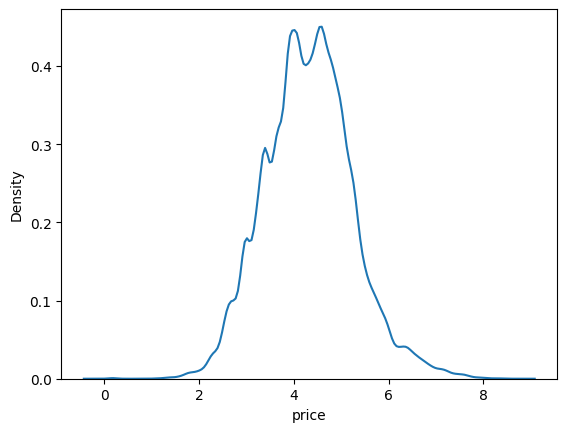

In [102]:
sns.kdeplot(df_target_log)

In [98]:
df_target = np.sqrt(merged_df['price'])
df_target.skew()

2.510024838430951

<Axes: xlabel='price', ylabel='Density'>

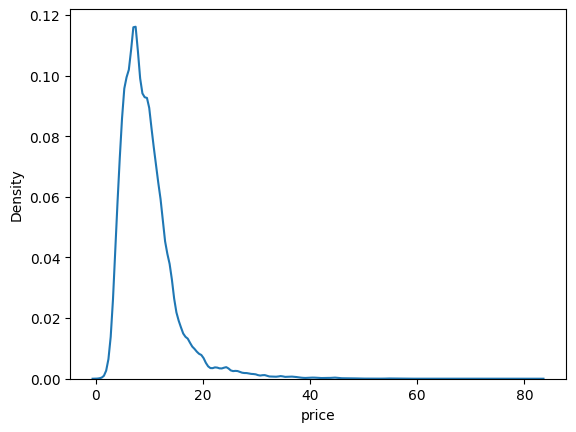

In [103]:
sns.kdeplot(df_target)

In [99]:
data = merged_df[['price']]

pt = PowerTransformer(method='yeo-johnson')    # This method give make my data nearest to normal distribution so will use this
transformed_data_yeo = pt.fit_transform(data)
skewness_yeo = stats.skew(transformed_data_yeo)
print(skewness_yeo)

[-0.00664307]


<Axes: ylabel='Density'>

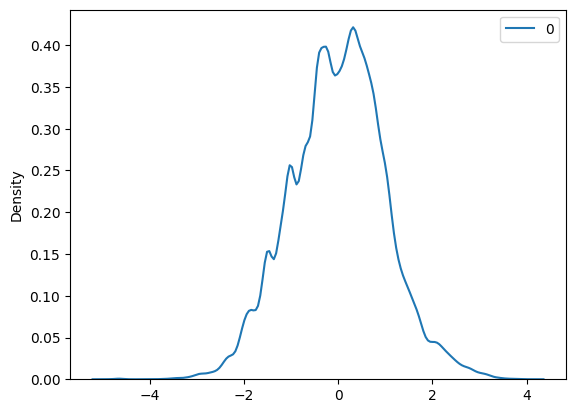

In [101]:
sns.kdeplot(transformed_data_yeo)

In [100]:
data = merged_df[['price']]

pt = PowerTransformer(method='box-cox')  
transformed_data_box = pt.fit_transform(data)
skewness_box = stats.skew(transformed_data_box)
print(skewness_box)

[-0.00796153]


<Axes: ylabel='Density'>

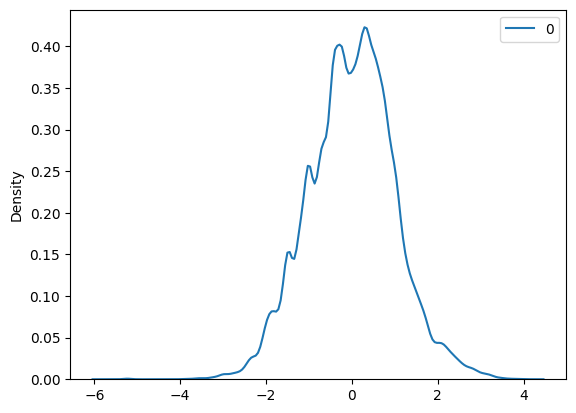

In [106]:
sns.kdeplot(transformed_data_box)

# Encoding Techniques

In [107]:
def cat_boost(cat_input,target):
    catboost = ce.cat_boost.CatBoostEncoder()
    catboost.fit(cat_input,target)
    df_encode= round(catboost.transform(cat_input),2)
    return df_encode

In [108]:
df_cat_en = cat_boost(df_cat_imputed,merged_df['price'])

In [109]:
df_cat_en.head()

,order_status,payment_type,review_comment_title,review_comment_message,product_category_name,customer_city,customer_state,seller_city,seller_state
0,119.77,126.25,119.14,52.62,90.61,108.14,109.9,59.33,108.65
1,119.77,104.29,119.14,52.62,90.61,108.14,109.9,59.33,108.65
2,119.77,104.29,119.14,52.62,90.61,108.14,109.9,59.33,108.65
3,119.77,126.25,119.14,120.52,90.61,108.14,109.9,59.33,108.65
4,119.77,126.25,119.14,120.52,90.61,108.14,109.9,59.33,108.65


In [110]:
final_df = pd.concat([num_scaled_data, df_cat_en], axis = 1)

In [111]:
final_df.head()

,freight_value,payment_sequential,payment_installments,payment_value,review_score,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_zip_code_prefix,seller_zip_code_prefix,order_status,payment_type,review_comment_title,review_comment_message,product_category_name,customer_city,customer_state,seller_city,seller_state
0,-0.714399,-0.129180,-0.699063,-0.580068,-0.022672,-0.884255,-0.794899,1.05873,-0.42552,-0.695686,-0.640215,-0.857473,-1.069072,-0.547482,119.77,126.25,119.14,52.62,90.61,108.14,109.9,59.33,108.65
1,-0.714399,2.606161,-0.699063,-0.640810,-0.022672,-0.884255,-0.794899,1.05873,-0.42552,-0.695686,-0.640215,-0.857473,-1.069072,-0.547482,119.77,104.29,119.14,52.62,90.61,108.14,109.9,59.33,108.65
2,-0.714399,1.238491,-0.699063,-0.578297,-0.022672,-0.884255,-0.794899,1.05873,-0.42552,-0.695686,-0.640215,-0.857473,-1.069072,-0.547482,119.77,104.29,119.14,52.62,90.61,108.14,109.9,59.33,108.65
3,-0.773787,-0.129180,0.021564,-0.506025,-0.022672,-0.884255,-0.794899,1.05873,-0.42552,-0.695686,-0.640215,-0.857473,-1.061802,-0.547482,119.77,126.25,119.14,120.52,90.61,108.14,109.9,59.33,108.65
4,-0.773787,-0.129180,-0.699063,-0.506025,0.697830,-0.884255,-0.794899,1.05873,-0.42552,-0.695686,-0.640215,-0.857473,-1.097850,-0.547482,119.77,126.25,119.14,120.52,90.61,108.14,109.9,59.33,108.65


# Assumptions of Linear Regression

### Assumption to be checked before building a model

* Target variable(Dependent variable) is price which is numeric variable. 

In [112]:
merged_df['price'].dtypes   # Price is target variable and is numeric  

dtype('float64')

* To check Absence of Multicollinearity we use VIF(Variance influence factor) method.
* HO : High multicollinearity
* H1 : No multicollinearity

In [113]:
df_numeric_X = sm.add_constant(df_num_imputed)
vif_value = [VIF(df_numeric_X.values, i) for i in range(df_numeric_X.shape[1])]
pd.DataFrame(vif_value, columns= ['VIF_Value'], index = df_numeric_X.columns).sort_values('VIF_Value', ascending=False)

,VIF_Value
const,46.266579
product_weight_g,2.605071
freight_value,1.904854
product_width_cm,1.627016
product_height_cm,1.550187
product_length_cm,1.534482
payment_value,1.270091
payment_installments,1.108986
customer_zip_code_prefix,1.091964
product_description_lenght,1.069064


* VIF values are not more that 5 so I conclude that all the columns are usefull for my model building. 

# Train Test Split

In [114]:
X = final_df
y = transformed_data_yeo

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .30, random_state = 10)
print("X Train shape is ",X_train.shape)
print("X Test shape is ",X_test.shape)
print("y Train shape is ",y_train.shape)
print("y Test shape is ",y_test.shape)

X Train shape is  (82130, 23)
X Test shape is  (35199, 23)
y Train shape is  (82130, 1)
y Test shape is  (35199, 1)


# Linear Regression Model

## Base Model

In [116]:
def performance(x,y,model):
    y_pred = model.predict(x)
    r2_sc = r2_score(y,y_pred)
    print("R2 score is : ", r2_sc)
    print("RMSE score is : ", np.sqrt(mean_squared_error(y, y_pred)))

In [117]:
X_c = sm.add_constant(X_train)
base_model = sm.OLS(y_train,X_c).fit()   # Linear regression model using statsmodel method
base_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     3190.
Date:                Wed, 07 Feb 2024   Prob (F-statistic):               0.00
Time:                        00:44:17   Log-Likelihood:                -90339.
No. Observations:               82130   AIC:                         1.807e+05
Df Residuals:                   82106   BIC:                         1.809e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.9965      0.072    -13.826      0.000      -1.138      -0.855
freight_value                  0.0154      0.004      4.063      0.000       0.008       0.023
payment_sequential             0.0154      0.003      5.888      0.000       0.010       0.020
payment_installments           0.1594      0.003     53.880      0.000       0.154       0.165
payment_value                  0.3284      0.003    101.376      0.000       0.322       0.335
review_score                   0.0408      0.003     15.545      0.000       0.036       0.046
product_name_lenght            0.0336      0.003     13.006      0.000       0.029       0.039
product_description_lenght     0.0982      0.003     37.005      0.000       0.093       0.103
product_photos_qty             0.0276      0.003     10.626      0.000       0.022       0.033
product_weight_g               0.0834      0.004     20.067      0.000       0.075       0.092
product_length_cm              0.0577      0.003     18.309      0.000       0.052       0.064
product_height_cm              0.0829      0.003     26.210      0.000       0.077       0.089
product_width_cm               0.0982      0.003     30.436      0.000       0.092       0.105
customer_zip_code_prefix      -0.0040      0.003     -1.304      0.192      -0.010       0.002
seller_zip_code_prefix         0.0721      0.003     24.534      0.000       0.066       0.078
order_status                   0.0021      0.000      4.775      0.000       0.001       0.003
payment_type                  -0.0009      0.000     -3.104      0.002      -0.002      -0.000
review_comment_title           0.0003      0.000      2.842      0.004       0.000       0.001
review_comment_message         0.0017   7.22e-05     23.164      0.000       0.002       0.002
product_category_name          0.0012   4.55e-05     25.512      0.000       0.001       0.001
customer_city                  0.0013   9.03e-05     14.856      0.000       0.001       0.002
customer_state                 0.0011      0.000      4.450      0.000       0.001       0.002
seller_city                    0.0024    4.2e-05     57.430      0.000       0.002       0.002
seller_state                  -0.0009   9.62e-05     -8.947      0.000      -0.001      -0.001
==============================================================================
Omnibus:                    24319.575   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           375257.543
Skew:                          -1.009   Prob(JB):                         0.00
Kurtosis:                      13.276   Cond. No.                     1.03e+04
==============================================================================

Notes:
[1] Standard Errors assume that the 

### Assumption to be checked after building a model

* H0 : When data is linear means Assumption is meet
* H1 : When data is not linear means Assumption is violated

In [118]:
y_pred = base_model.fittedvalues
residuals = base_model.resid

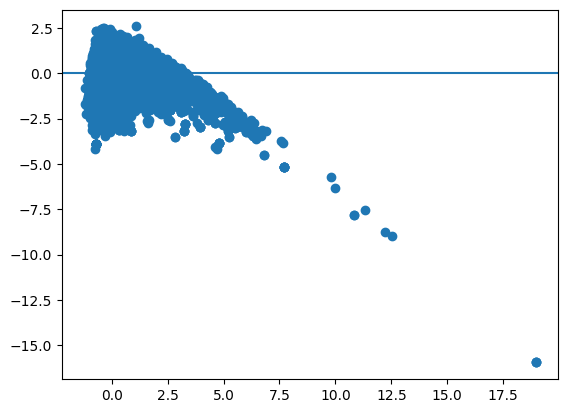

In [119]:
plt.scatter(y_pred, residuals)
plt.axhline(0)
plt.show()

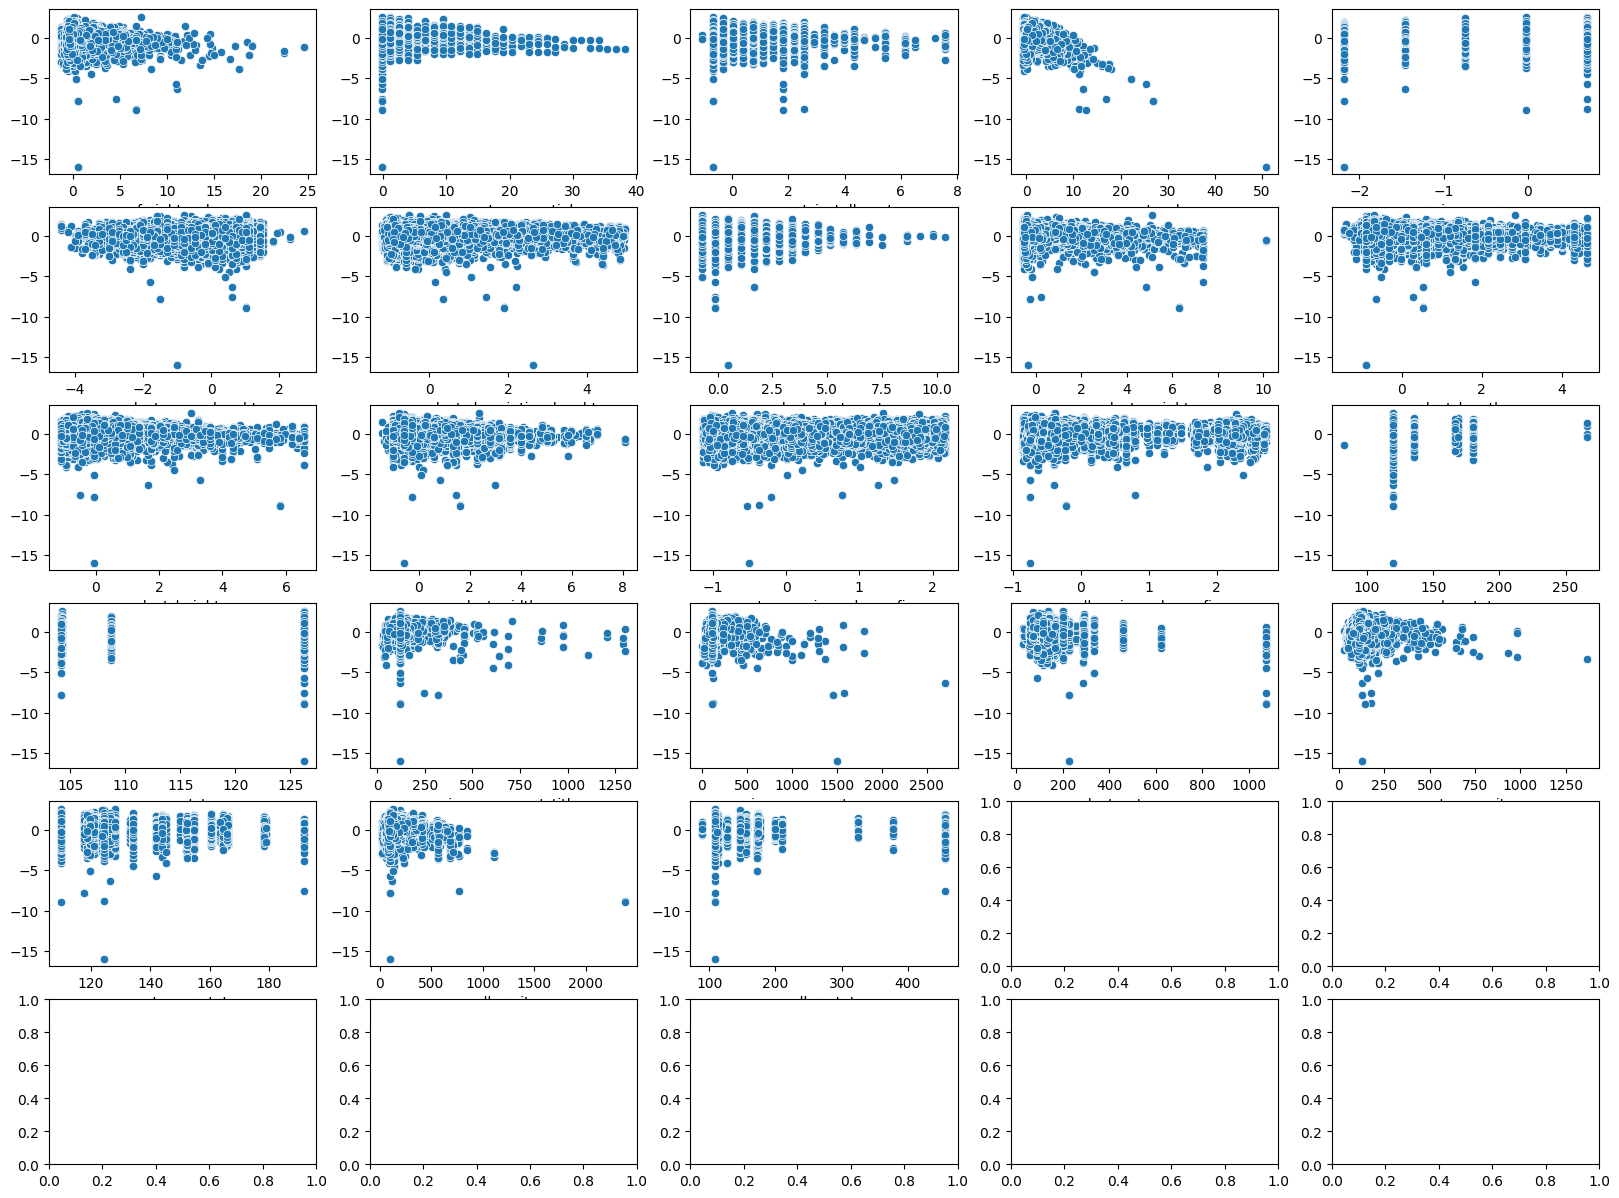

In [120]:
fig, ax = plt.subplots(nrows = 6, ncols = 5, figsize = (20,15))

for variable, subplot in zip(X_c.columns[1:], ax.flatten()):
    sns.scatterplot(x = X_c[variable], y = base_model.resid, ax = subplot)
plt.show()

* H0 : The error terms are not autocorrelated       
* H1 : The error terms are autocorrelated

In [121]:
from statsmodels.stats.api import durbin_watson   # There is autocorrealtion. The assumption is violated because p value is greater than 0.05
durbin_watson(residuals)

1.9919756300068703

* H0 : The errors terms are homoskedastic
* H1 : The errors terms are heteroskedastic

In [122]:
from statsmodels.stats.api import het_breuschpagan
test_stats, p_value = het_breuschpagan(residuals, X_c)[2:] 
print("p value", p_value)

p value 0.0


<Axes: ylabel='Density'>

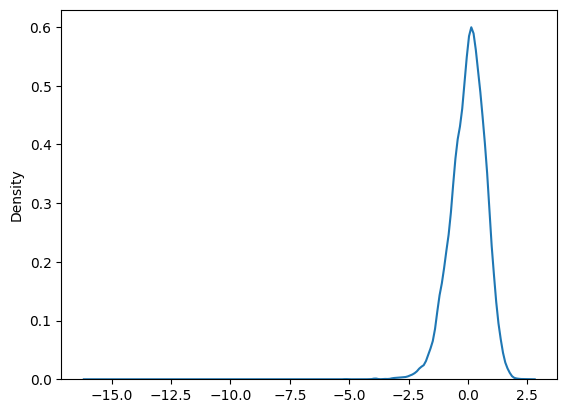

In [123]:
sns.kdeplot(residuals)

In [124]:
# H0 : Data is normal 
# H1 : Data is not normal 
stats.shapiro(residuals)  

ShapiroResult(statistic=0.9688560366630554, pvalue=0.0)

In [125]:
from statsmodels.stats.api import jarque_bera
test_stat, p_value, res_skew, res_kurt = jarque_bera(residuals)
p_value

0.0

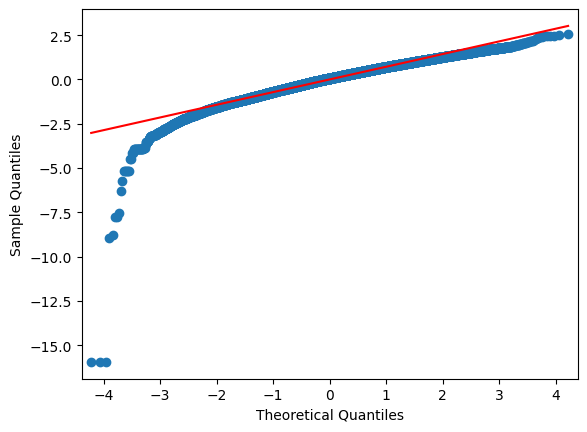

In [126]:
# QQPLOT -- QUANTILE PLOT -- Data is not normal because it is not along the line -- positive and negative data
sm.qqplot(residuals, line = 'r');

In [127]:
lr=LinearRegression()
model_lr = lr.fit(X_train,y_train)   # Linear regression model using sklearn method
model_lr

LinearRegression()

In [128]:
performance(X_train,y_train,model_lr)  # Training R2 and RMSE score

R2 score is :  0.47190320022611276
RMSE score is :  0.7268834465948515


In [129]:
performance(X_test,y_test,model_lr)  # Testing R2 and RMSE score

R2 score is :  0.4394121981755589
RMSE score is :  0.7482893584212192


# Decision Tree

In [133]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [134]:
performance(X_train,y_train,dt)

R2 score is :  0.9999998212967505
RMSE score is :  0.0004228382198091738


In [135]:
performance(X_test,y_test,dt)

R2 score is :  0.8674815393240086
RMSE score is :  0.3638194714640031


# KNN

In [136]:
gnb = KNeighborsRegressor()
gnb.fit(X_train,y_train)

KNeighborsRegressor()

In [137]:
performance(X_train,y_train,gnb)

R2 score is :  0.6448676274980267
RMSE score is :  0.5960780672786223


In [138]:
performance(X_test,y_test,gnb)

R2 score is :  0.45192046460335833
RMSE score is :  0.7398940596427742


# Random Forest

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

In [ ]:
performance(X_train,y_train,rf)

In [ ]:
performance(X_test,y_test,rf)

# Adaboost 

In [ ]:
adb = AdaBoostRegressor()
adb.fit(X_train,y_train)

In [ ]:
performance(X_train,y_train,adb)

In [ ]:
performance(X_test,y_test,adb)

# GradientBoosting

In [ ]:
gb = GradientBoostingRegressor()
gb.fit(X_train,y_train)

In [ ]:
performance(X_train,y_train,gb)

In [ ]:
performance(X_test,y_test,gb)

# Ridge

In [67]:
rg = Ridge()
rg.fit(X_train,y_train)

Ridge()

In [68]:
performance(X_train,y_train,rg)

R2 score is :  0.4882244913612943
RMSE score is :  0.7160155203707526


In [69]:
performance(X_test,y_test,rg)

R2 score is :  0.4902976097702507
RMSE score is :  0.7124608752188296


# Lasso

In [70]:
ls = Lasso()
ls.fit(X_train,y_train)

Lasso()

In [71]:
performance(X_train,y_train,ls)

R2 score is :  0.284214875875034
RMSE score is :  0.8467866861528457


In [72]:
performance(X_test,y_test,ls)

R2 score is :  0.2816588467321063
RMSE score is :  0.8458007360400194


# ElasticNet

In [73]:
en = ElasticNet()
en.fit(X_train,y_train)

ElasticNet()

In [74]:
performance(X_train,y_train,en)

R2 score is :  0.2864716494005458
RMSE score is :  0.8454507304481018


In [75]:
performance(X_test,y_test,en)

R2 score is :  0.28395584672399543
RMSE score is :  0.8444473680318797


# XGBRegressor

In [76]:
xgb = XGBRegressor()
xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [77]:
performance(X_train,y_train,xgb)

R2 score is :  0.9918968905847093
RMSE score is :  0.09009662827163538


In [78]:
performance(X_test,y_test,xgb)

R2 score is :  0.9836429925019686
RMSE score is :  0.12763054135595173
